<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#env-(concept-from-0519_IRL.ipynb)" data-toc-modified-id="env-(concept-from-0519_IRL.ipynb)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>env (concept from 0519_IRL.ipynb)</a></span></li><li><span><a href="#parameters-(brought-from-modIRL.R)" data-toc-modified-id="parameters-(brought-from-modIRL.R)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>parameters (brought from modIRL.R)</a></span><ul class="toc-item"><li><span><a href="#growth-rate-ranges,-$23^oC$" data-toc-modified-id="growth-rate-ranges,-$23^oC$-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>growth rate ranges, $23^oC$</a></span></li><li><span><a href="#phytoplankton-non-respired-fraction-range" data-toc-modified-id="phytoplankton-non-respired-fraction-range-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>phytoplankton non-respired fraction range</a></span></li><li><span><a href="#phytoplankton-fraction-of-biomass-incorporated-carbon" data-toc-modified-id="phytoplankton-fraction-of-biomass-incorporated-carbon-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>phytoplankton fraction of biomass-incorporated carbon</a></span></li><li><span><a href="#phytoplankton-intraspecific-interference" data-toc-modified-id="phytoplankton-intraspecific-interference-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>phytoplankton intraspecific interference</a></span></li><li><span><a href="#final-parameter-set" data-toc-modified-id="final-parameter-set-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>final parameter set</a></span></li></ul></li><li><span><a href="#when-no-artificial-removal" data-toc-modified-id="when-no-artificial-removal-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>when no artificial removal</a></span></li><li><span><a href="#artificial-removal-exist" data-toc-modified-id="artificial-removal-exist-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>artificial removal exist</a></span></li><li><span><a href="#carbon-removal-effect-on-carbon-pools-equilibrium" data-toc-modified-id="carbon-removal-effect-on-carbon-pools-equilibrium-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>carbon removal effect on carbon pools equilibrium</a></span></li></ul></div>

# env (concept from 0519_IRL.ipynb)

In [1]:
library(repr) ; options(repr.plot.width=18, repr.plot.height= 10) ## change plot default parameter in Jupyter
source("../code/func.R")
gRate = read.csv("../data/gRate.csv", header = T) ## rate determined by `rateDet.R` using BioTrait database
rEspR = read.csv("../data/photoResp.csv", stringsAsFactors = F) ## phytoplankton respiration linear models collected from literature (data from Table 3 of https://doi.org/10.1111/j.1469-8137.1989.tb00321.x)

# parameters (brought from modIRL.R)

## growth rate ranges, $23^oC$

In [2]:
gRate$rate.23C = ArrheniusEq(gRate$stdConst.day,gRate$Ea.eV,23) ## temperature-standardized growth rate
gP = range(gRate$rate.23C[which(gRate$role=="photocell")])
gB = range(gRate$rate.23C[which(gRate$role!="photocell")])
gP;gB

[1] 0.03360526 3.16955368

[1] 6.916005e-05 3.495348e+01

## phytoplankton non-respired fraction range

In [3]:
rEspR = rEspR[which(rEspR$temperature.C>=23 & rEspR$temperature.C<=25),]
ePR = c()
for(i in 1:nrow(rEspR)){
  tmp = 1 - (rEspR$slope[i]*gP + rEspR$intercept[i]) / ((rEspR$slope[i] + 1)*gP + rEspR$intercept[i]) ## non-respired fraction with logic explained above
  ePR = c(ePR,tmp)
  };rm(i,tmp)
ePR = range(ePR)
ePR

[1] 0.07661135 0.87399580

## phytoplankton fraction of biomass-incorporated carbon

In [4]:
eP = c(.75, .75, .82, 1.2, .75, 1.4, 1.1, .9, .5, .4, .85, 1.2, .63) ## data collected from literature (Table 5 "heterotrophic growth of microalgae" section in https://doi.org/10.1111/j.1469-8137.1989.tb00321.x)
eP = range(eP)
if(eP[2]>1){eP[2]=1} ## capped at 1 assuming phytoplanktons do not consume organic carbon in this model
eP

[1] 0.4 1.0

## phytoplankton intraspecific interference

In [5]:
aP = c(.36, .22, .43) ## data collected from literature (left column text middle part in p.4 from https://doi.org/10.1016/j.jbiotec.2007.01.009)
aP = range(aP)
aP

[1] 0.22 0.43

## final parameter set

In [6]:
pA0 = c(0, mean(ePR), mean(eP), mean(gP), mean(aP), 1-100*10^-3/28/(1-0.8), .55, mean(gB), -log(.5/5))
pA1 = c(.5, mean(ePR), mean(eP), mean(gP), mean(aP), 1-100*10^-3/28/(1-0.8), .55, mean(gB), -log(.5/5))

# when no artificial removal

In [7]:
pA0

[1]  0.0000000  0.4753036  0.7000000  1.6015795  0.3250000  0.9821429  0.5500000
[8] 17.4767735  2.3025851

In [8]:
ebcAlt(pA0)

C,P,B,total
<dbl>,<dbl>,<dbl>,<dbl>
0.000000,0.000000,0.00000,0.000000
0.243903,0.000000,0.00000,0.243903
Inf,1.639586,0.00000,Inf
0.243903,1.639586,16.39697,18.280456


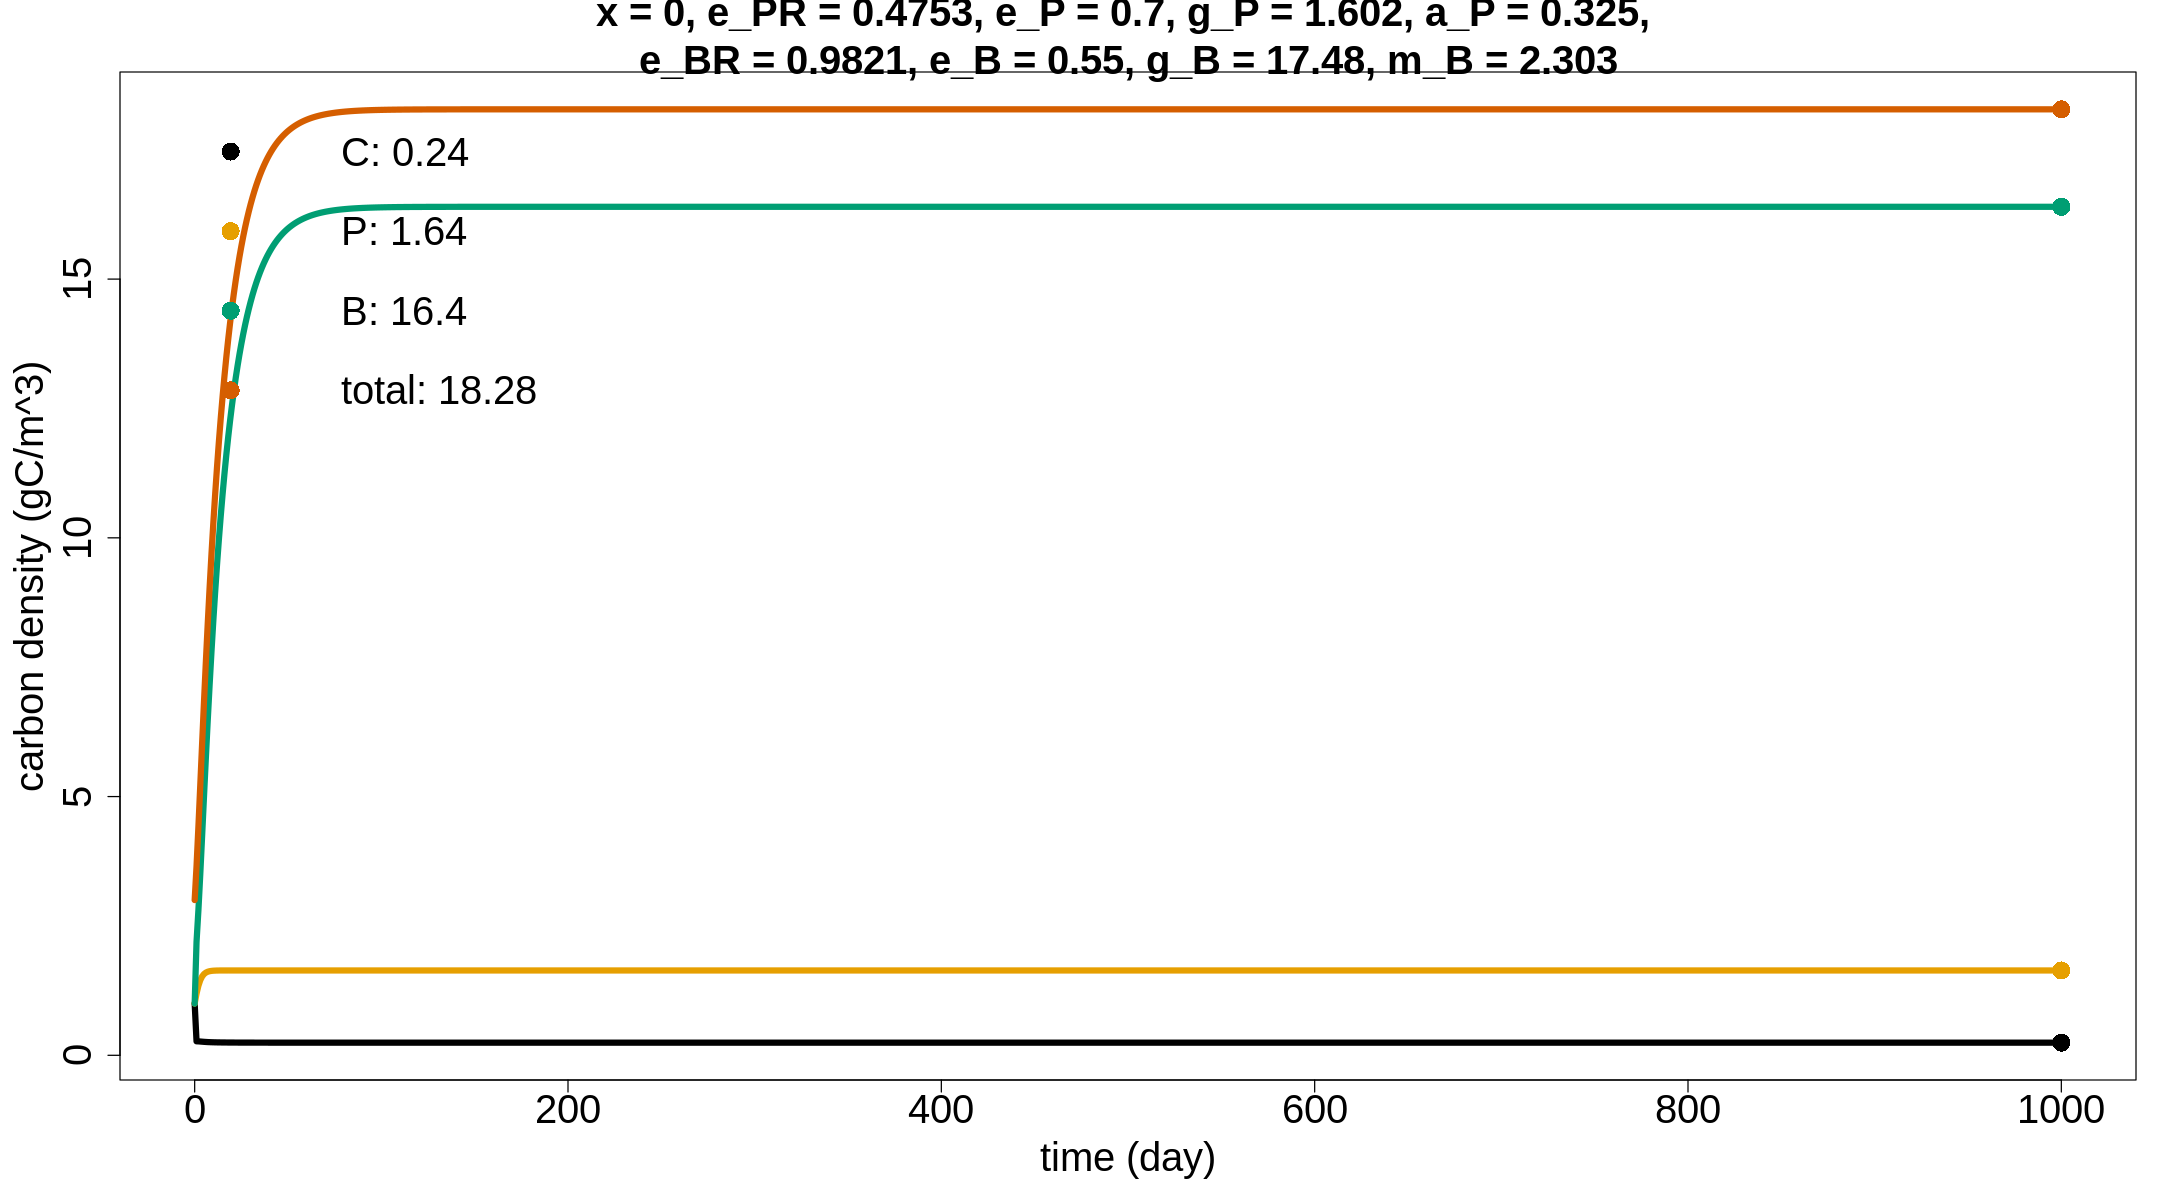

In [9]:
ebcPlt(rep(1,3),pA0)

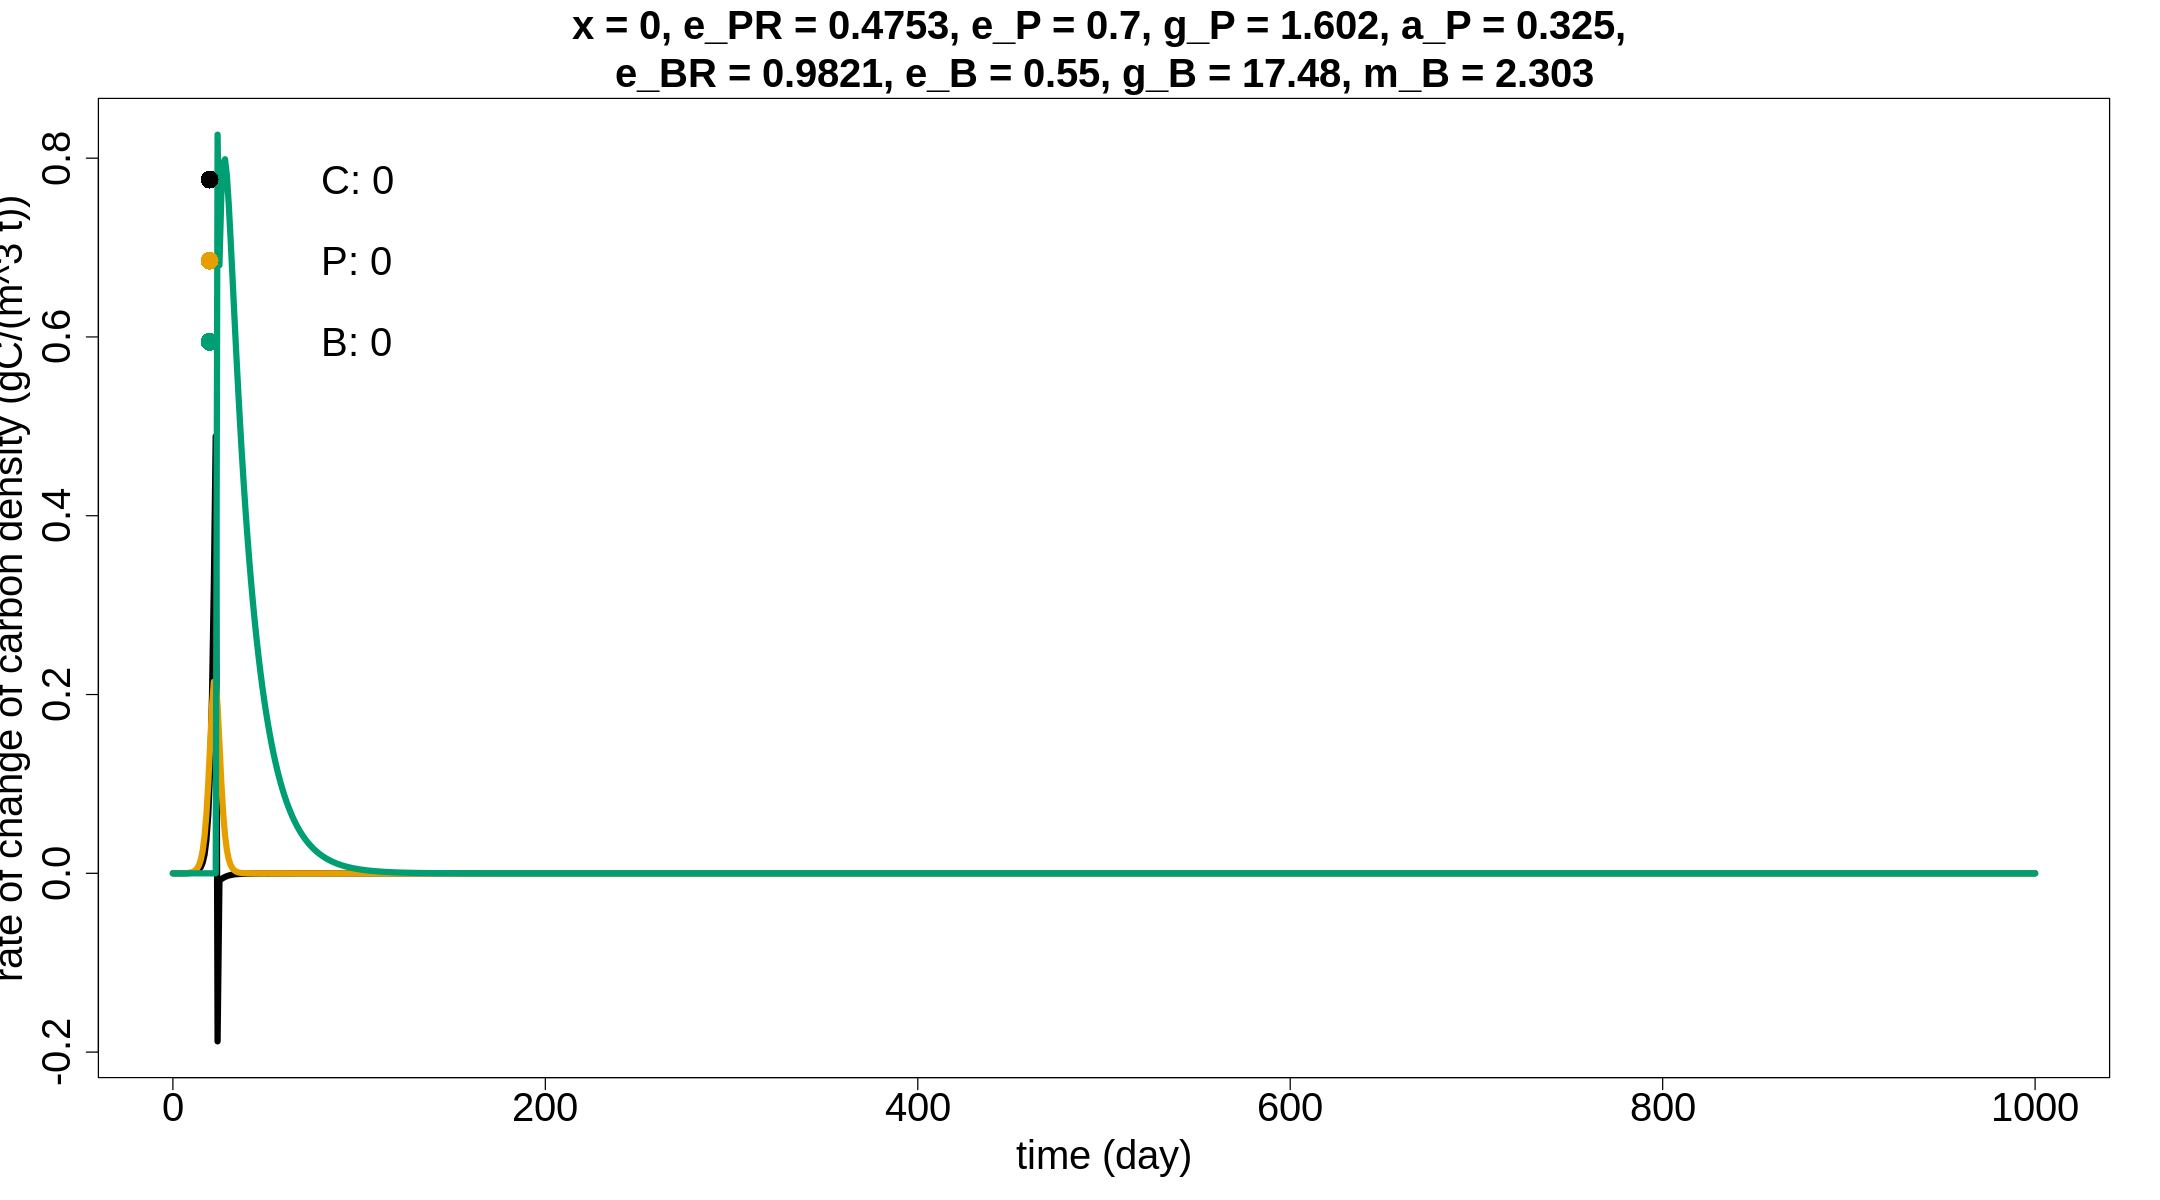

In [10]:
ebcRPlt(rep(1,3),pA0)

# artificial removal exist

In [11]:
pA1

[1]  0.5000000  0.4753036  0.7000000  1.6015795  0.3250000  0.9821429  0.5500000
[8] 17.4767735  2.3025851

In [12]:
ebcAlt(pA1)

C,P,B,total
<dbl>,<dbl>,<dbl>,<dbl>
0.000000,0.000000,0.000000,0.000000
0.243903,0.000000,-1.602126,-1.358223
2.496226,1.639586,0.000000,4.135812
0.243903,1.639586,14.794840,16.678329


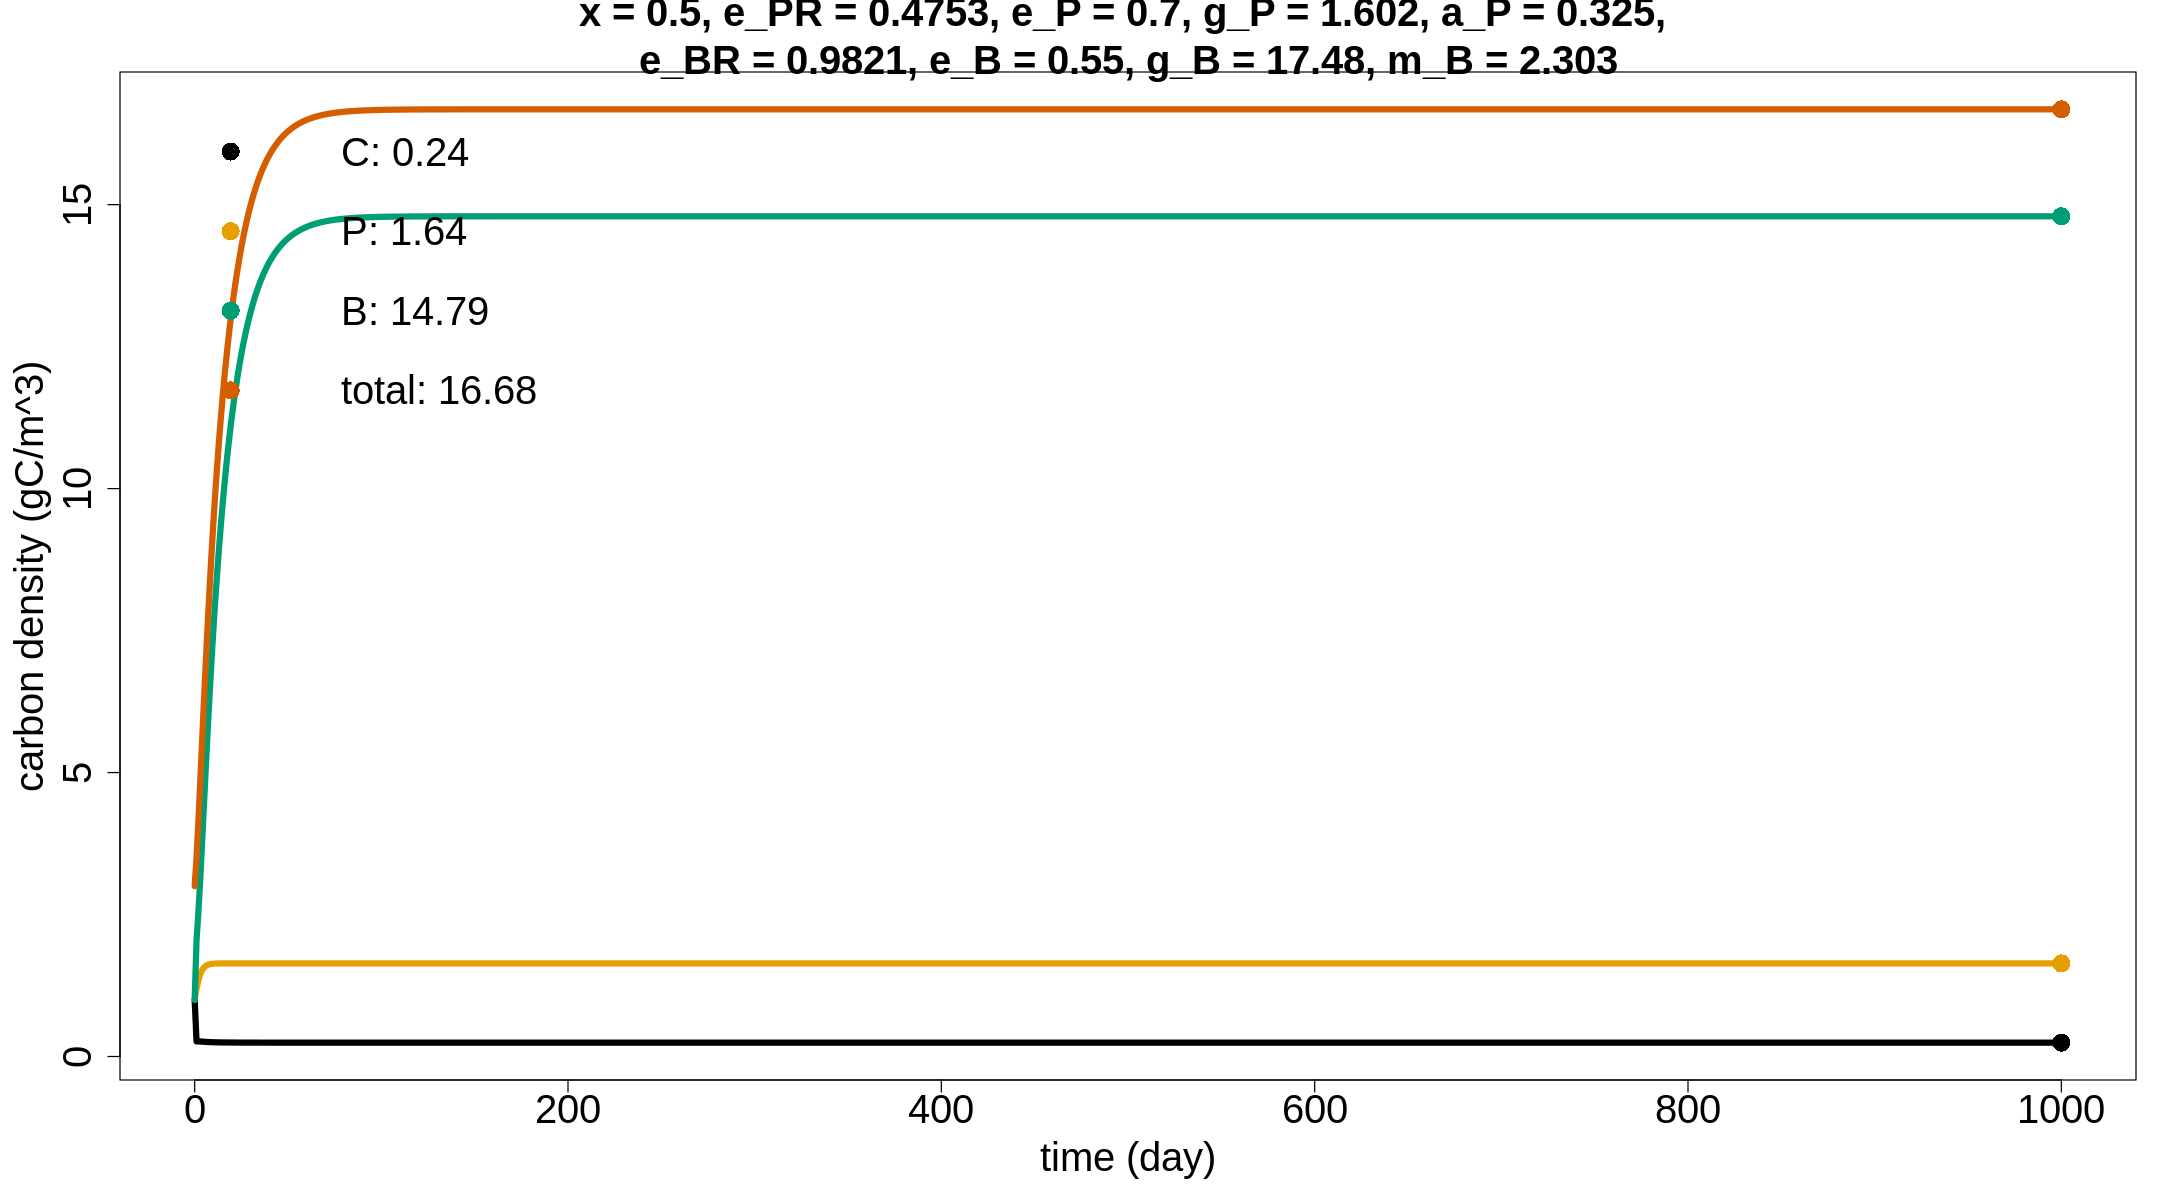

In [13]:
ebcPlt(rep(1,3),pA1)

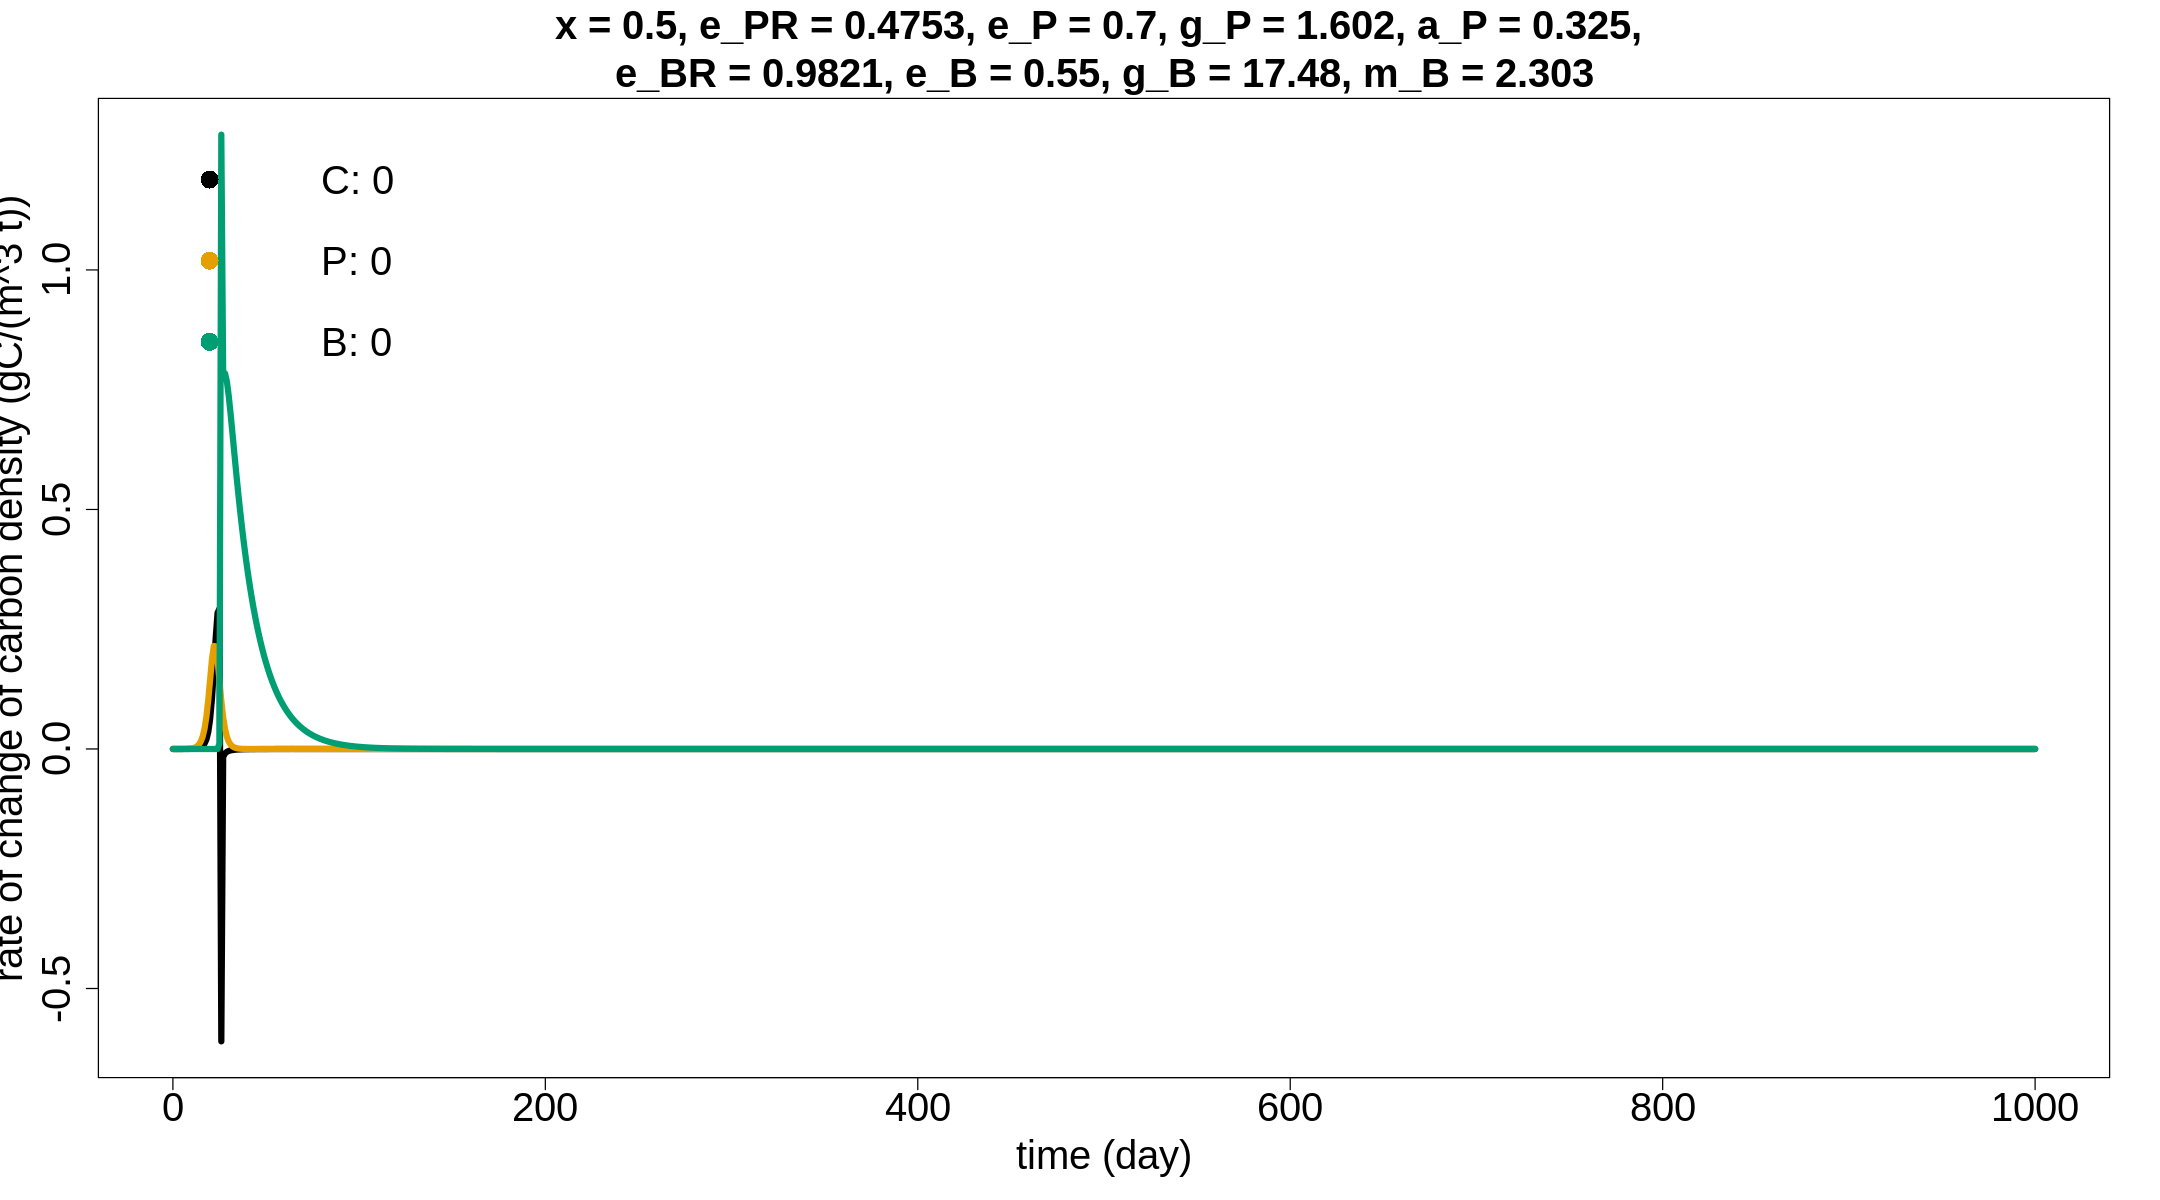

In [14]:
ebcRPlt(rep(1,3),pA1)

# carbon removal effect on carbon pools equilibrium

In [15]:
tS = seq(0,10,.1)
e2 = e3 = e4 = as.data.frame(matrix(nr=length(tS), nc=4))
colnames(e2) = colnames(e3) = colnames(e4) = c("C", "P", "B", "A")
tP = pA0
for(i in 1:length(tS)){
    tP[1] = tS[i]
    tA = ebcAlt(tP)
    e2[i,] = tA[2,]
    e3[i,] = tA[3,]
    e4[i,] = tA[4,]
};rm(i)

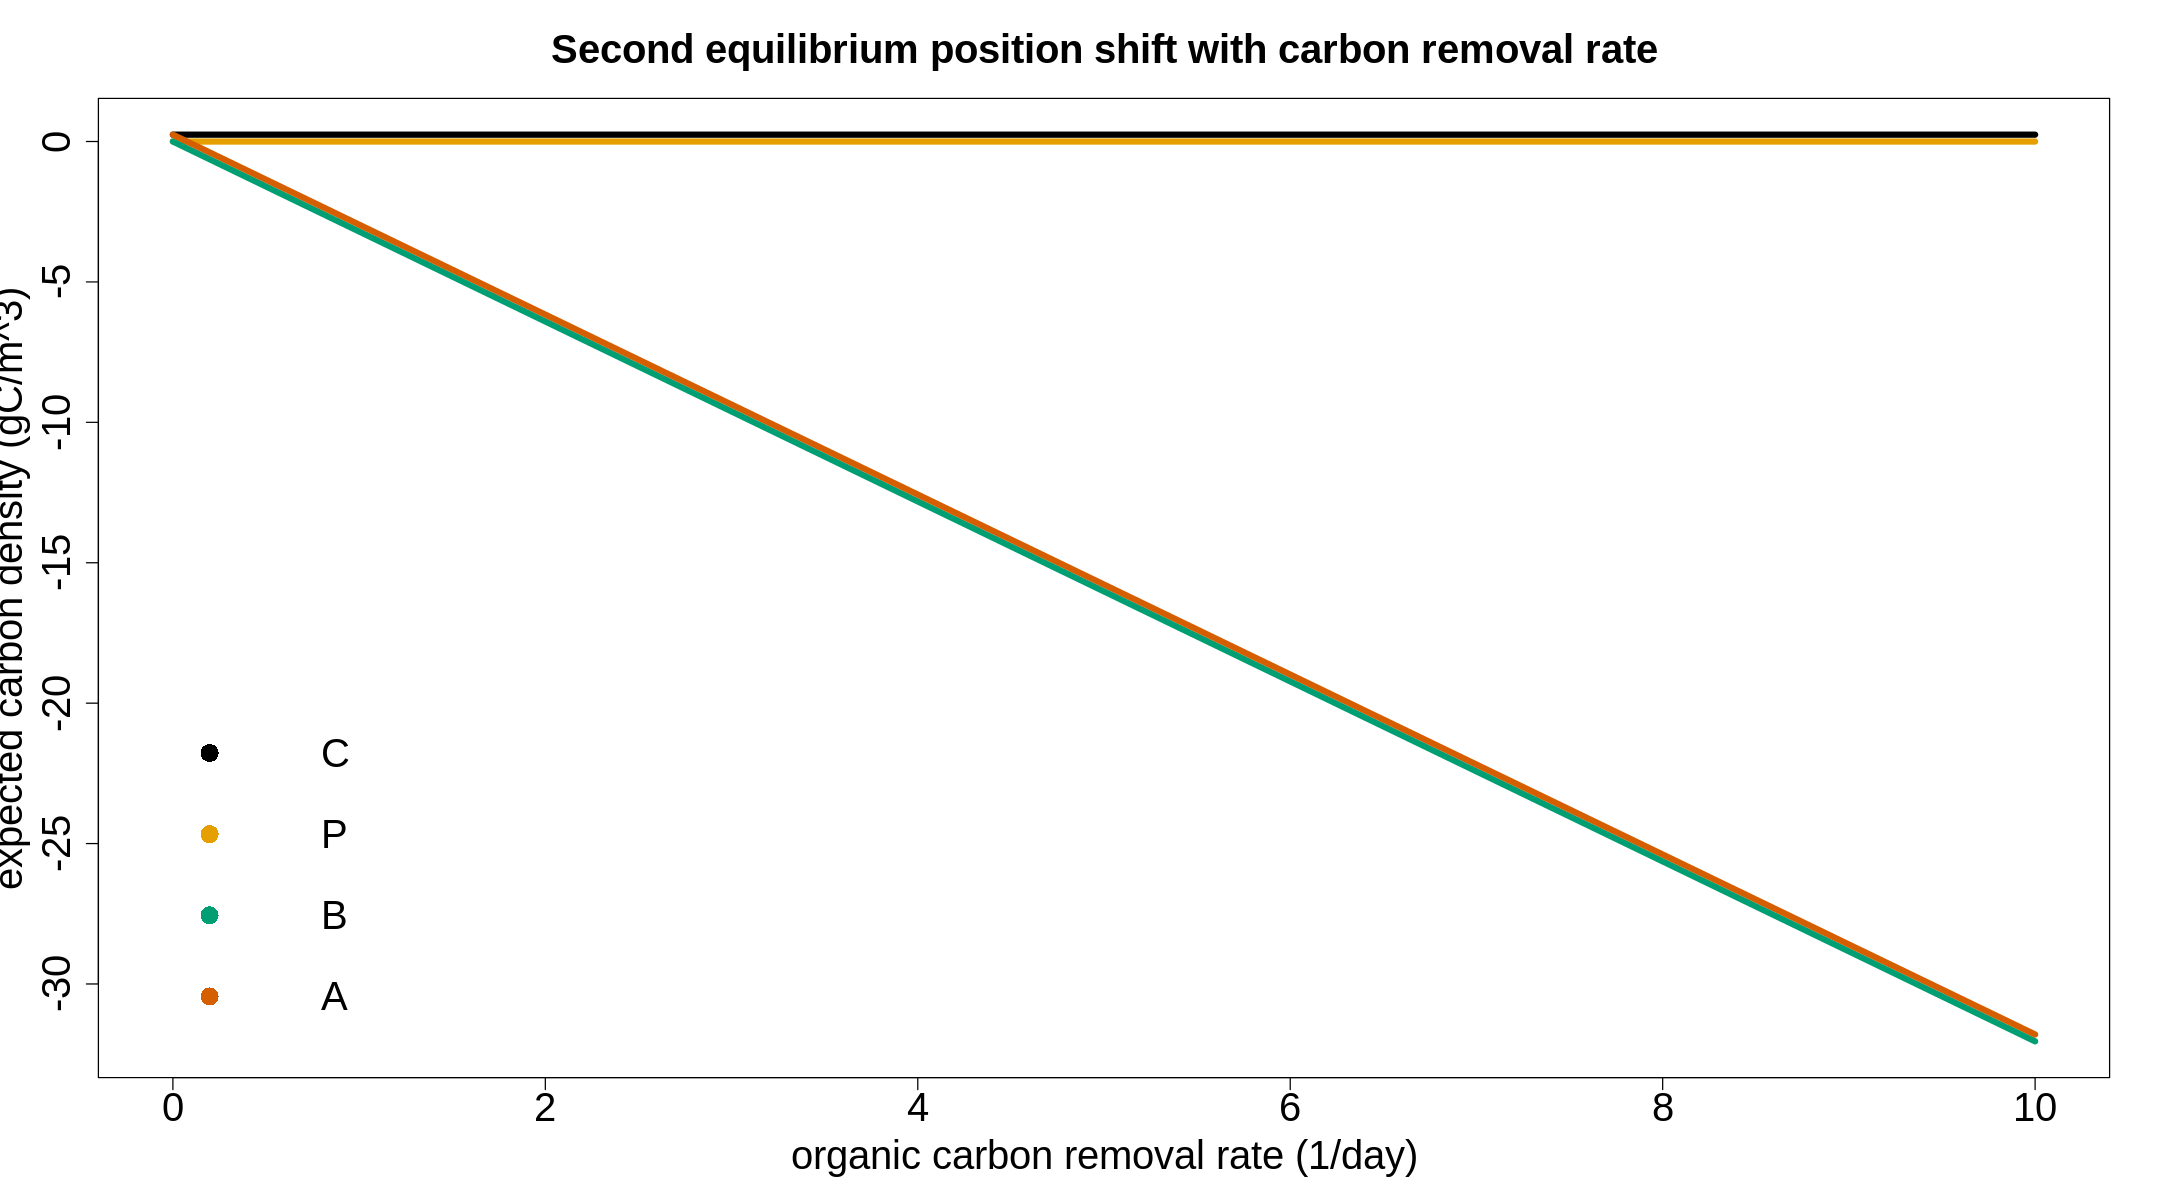

In [16]:
matplot(tS,e2,col=cBp[-c(3,5)], type="l",lty=1,lwd=5, xlab="organic carbon removal rate (1/day)",ylab="expected carbon density (gC/m^3)", cex.lab=2,cex.axis=2,cex.main=2, main="Second equilibrium position shift with carbon removal rate")
legend("bottomleft", inset=c(0,0), legend = colnames(e2), pch = rep(16,4), col = cBp[-c(3,5)], bty="n", cex = 2)

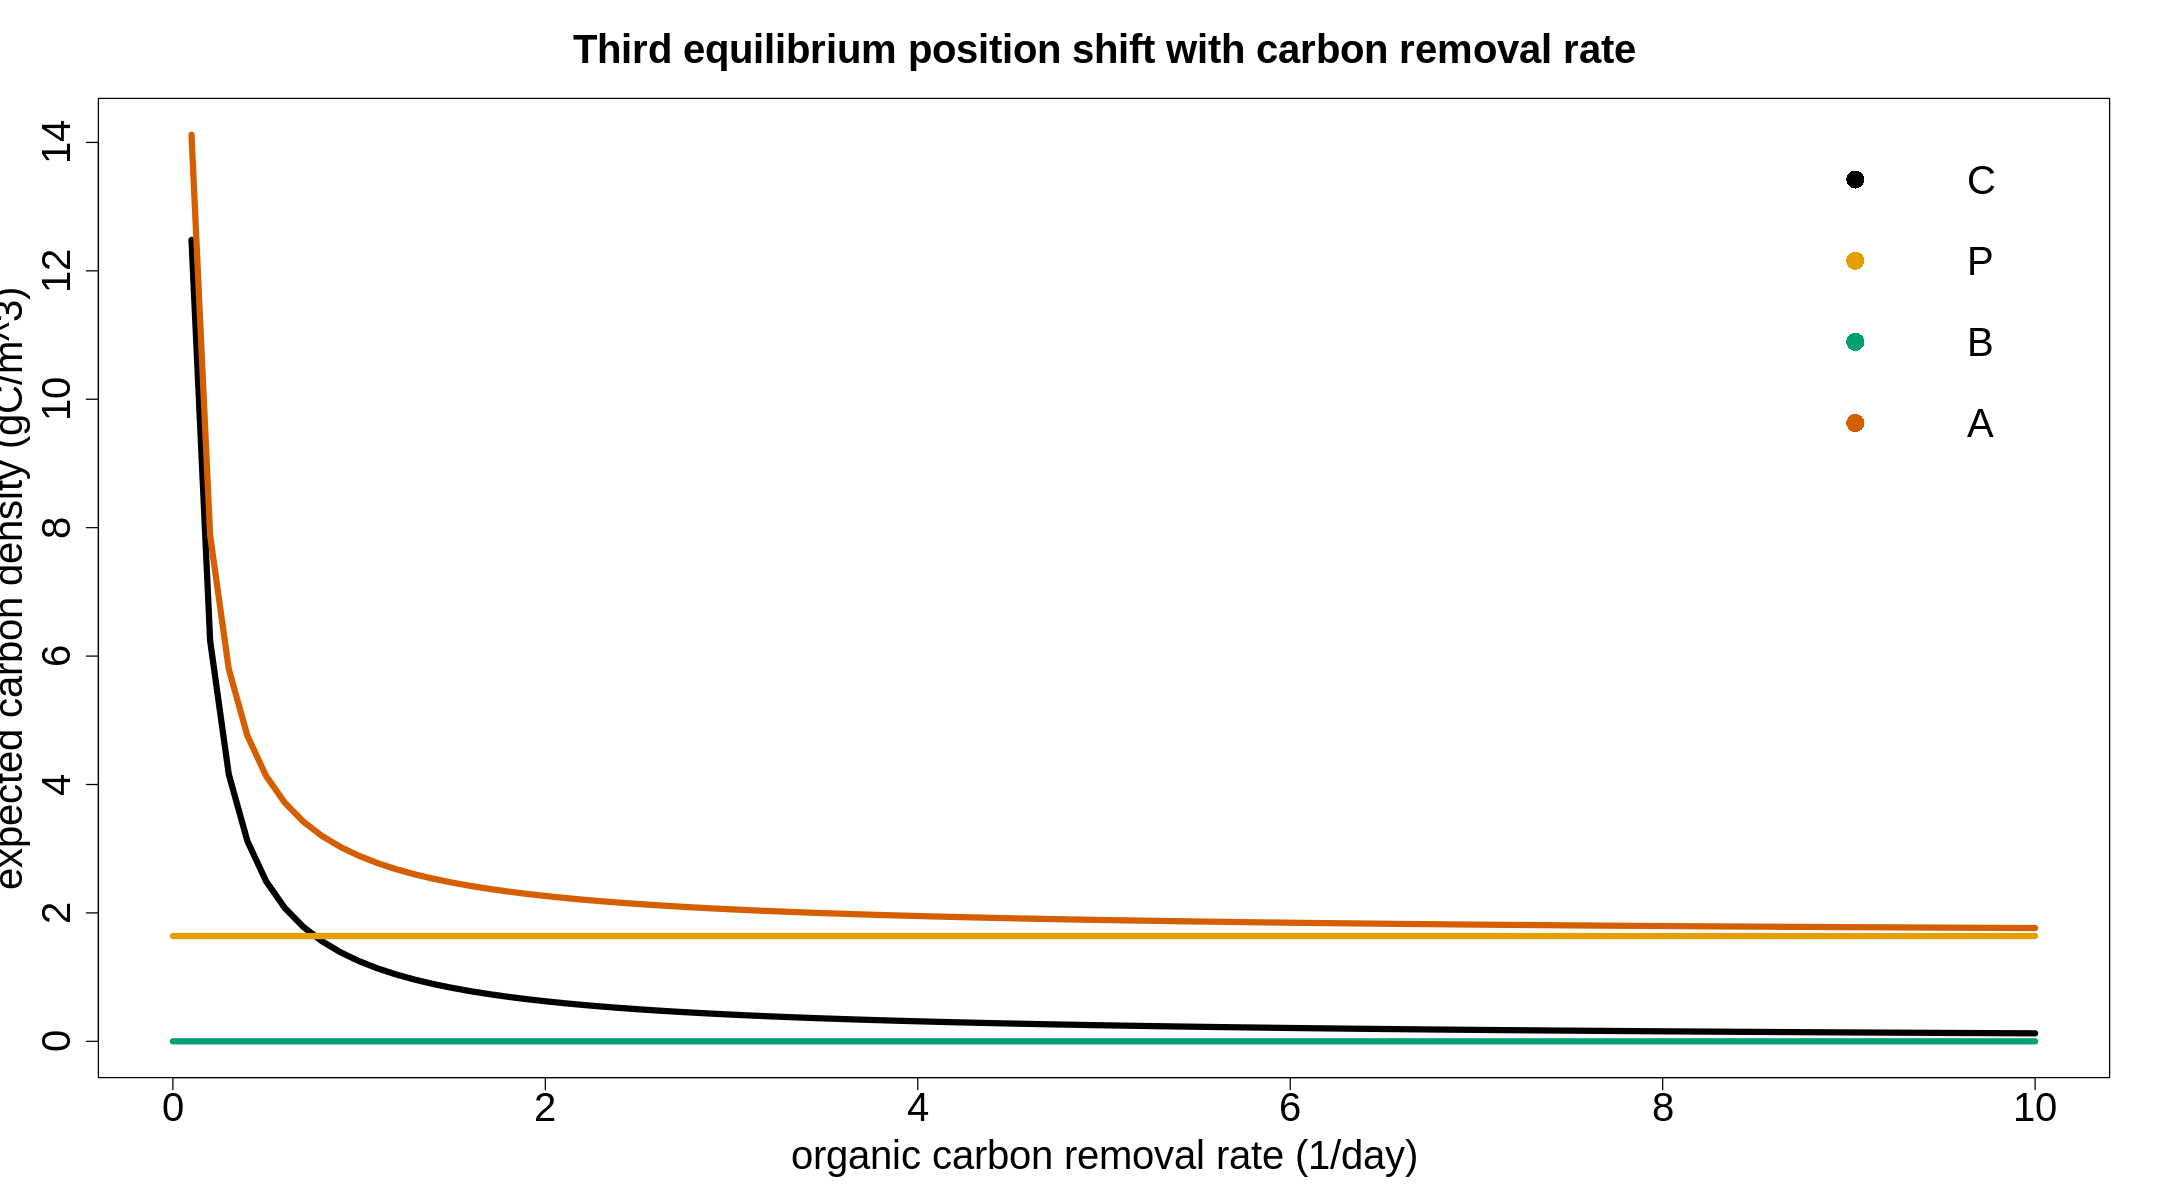

In [17]:
matplot(tS,e3,col=cBp[-c(3,5)], type="l",lty=1,lwd=5, xlab="organic carbon removal rate (1/day)",ylab="expected carbon density (gC/m^3)", cex.lab=2,cex.axis=2,cex.main=2, main="Third equilibrium position shift with carbon removal rate")
legend("topright", inset=c(0,0), legend = colnames(e3), pch = rep(16,4), col = cBp[-c(3,5)], bty="n", cex = 2)

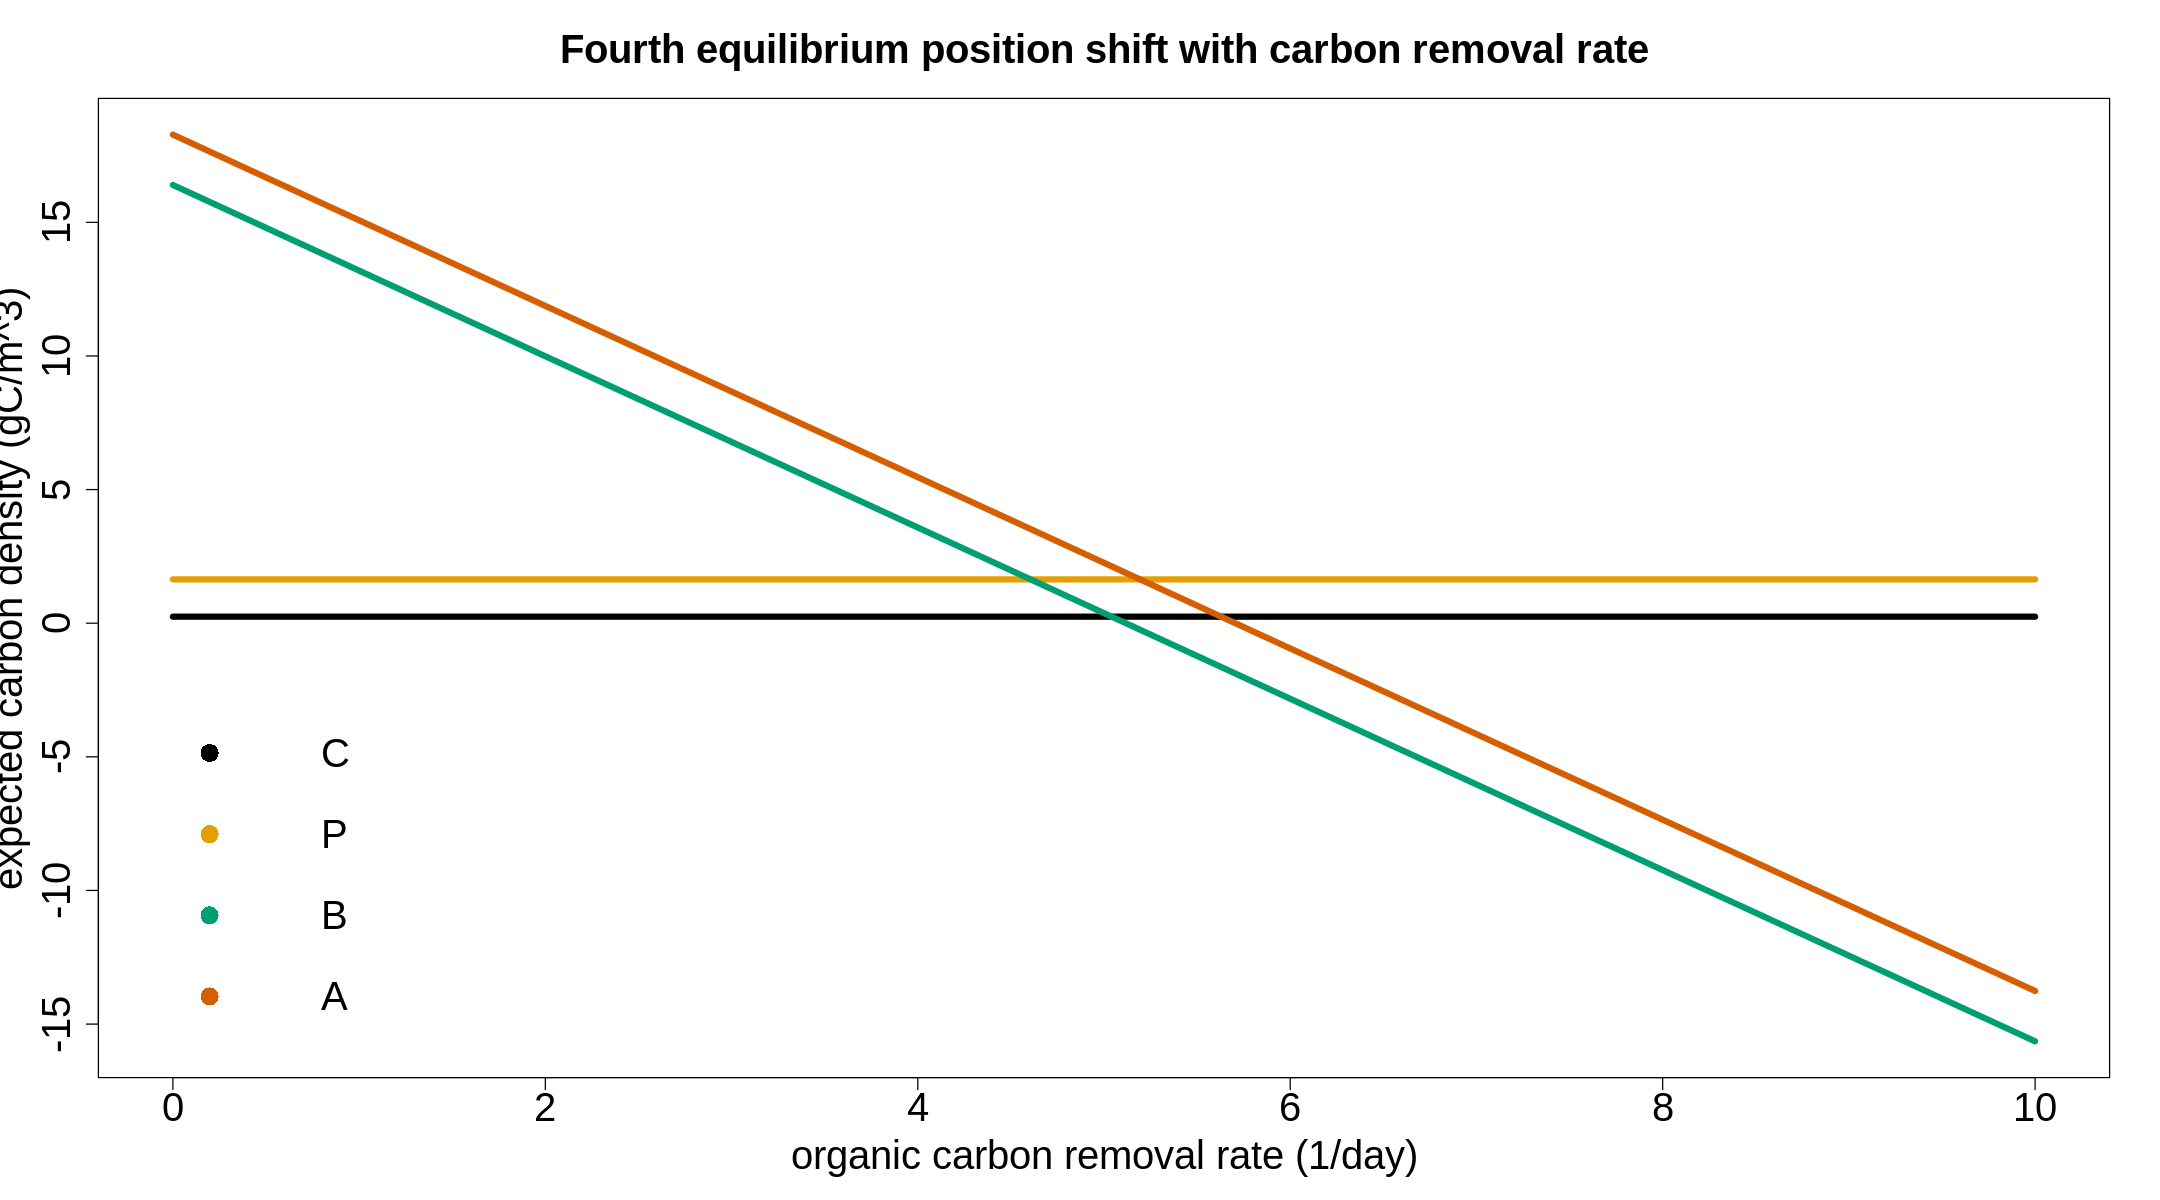

In [18]:
matplot(tS,e4,col=cBp[-c(3,5)], type="l",lty=1,lwd=5, xlab="organic carbon removal rate (1/day)",ylab="expected carbon density (gC/m^3)", cex.lab=2,cex.axis=2,cex.main=2, main="Fourth equilibrium position shift with carbon removal rate")
legend("bottomleft", inset=c(0,0), legend = colnames(e4), pch = rep(16,4), col = cBp[-c(3,5)], bty="n", cex = 2)